<a href="https://colab.research.google.com/github/fhzh123/CAU_mAI/blob/main/AI%ED%95%B5%EC%8B%AC%EB%8F%99%ED%96%A5_%EC%8B%A4%EC%8A%B5%EC%9E%90%EB%A3%8C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군AI교육지원사업

## WEEK 1 - First class

### 정상 동작 확인

In [1]:
1 + 1

2

### Google Drive와의 연동

In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### PyTorch Import

In [4]:
import torch
print(torch.__version__)

1.13.0+cu116


In [5]:
import torchvision
import torchtext

print(torchvision.__version__)
print(torchtext.__version__)

0.14.0+cu116
0.14.0


In [7]:
import tensorflow as tf
print(tf.__version__)

2.9.2


### 간단한 Numpy실습

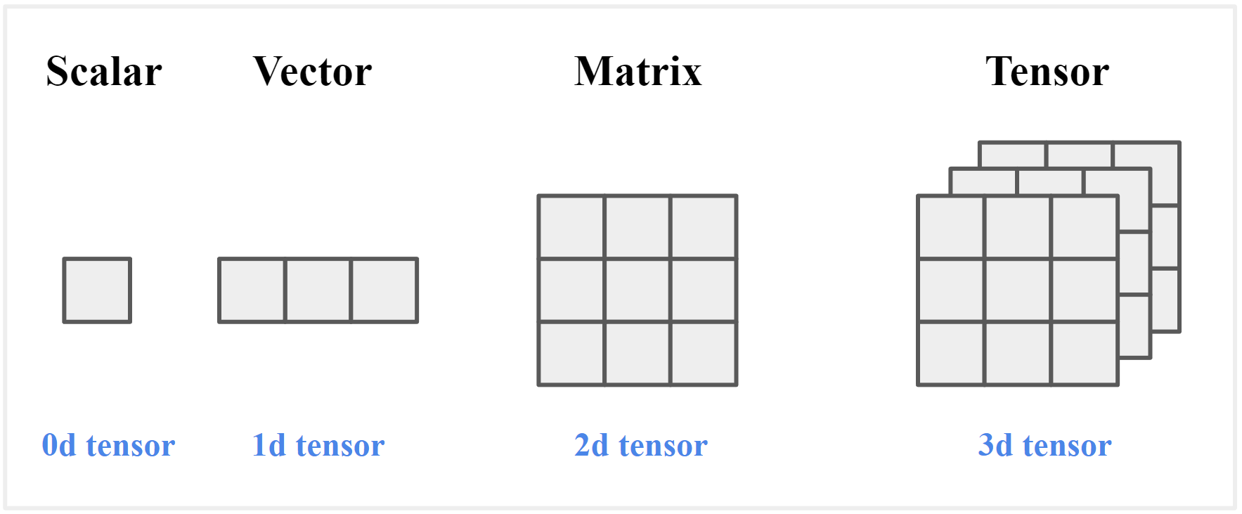

Numpy를 통해 벡터를 구현합니다.

In [8]:
import numpy as np

In [9]:
data = [1,2,3,4] # 데이터 생성
array = np.array(data) # NumPy의 array로 변환
array

array([1, 2, 3, 4])

In [10]:
array.shape # 벡터의 크기 확인 가능

(4,)

In [11]:
array[0] # python의 모든 인덱스는 0부터 시작

1

In [12]:
array[1:3] # 2번째 요소부터 3번째 요소까지

array([2, 3])

Numpy를 통해 행렬을 구현합니다.

In [13]:
array2 = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]]) # 2차원 행렬 생성
array2

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [14]:
array2.shape

(4, 3)

In [15]:
arr1 = np.array([[1,2],[3,4]])
arr2 = np.array([[5,4],[2,1]])

In [16]:
arr1 + arr2

array([[6, 6],
       [5, 5]])

In [17]:
arr1 * arr2

array([[5, 8],
       [6, 4]])

In [18]:
arr1 * 2

array([[2, 4],
       [6, 8]])

### PyTorch 실습

일반적인 덧셈 연산처럼 각 텐서들의 연산이 가능합니다.

In [44]:
a = torch.tensor(1)
b = torch.tensor(2)
print(a+b)

tensor(3)


Numpy때와 마찬가지로 행렬(텐서)생성 및 연산이 가능합니다.

In [19]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [20]:
x_data

tensor([[1, 2],
        [3, 4]])

Numpy의 array값을 활용해서 PyTorch의 tensor를 만들 수 있습니다.

In [21]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [22]:
x_np

tensor([[1, 2],
        [3, 4]])

파이토치는 view를 통해서 텐서 변환을 쉽게 할 수 있습니다.

In [48]:
x = np.array([[[0,1,2], [3,4,5]],[[6,7,8], [9,10,11]]])
xx = torch.FloatTensor(x)
print(xx)
print(xx.size())

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]])
torch.Size([2, 2, 3])


In [49]:
print(xx.view([-1, 3])) # (?, 3) 크기의 텐서 변환
print(xx.view([-1, 3]).size())

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


주어진 텐서로부터 다른 텐서를 생성할 수도 있습니다.

In [23]:
x_ones = torch.ones_like(x_data) # x_data의 속성을 유지합니다.
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # x_data의 속성을 덮어씁니다.
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7613, 0.5113],
        [0.6975, 0.3704]]) 



In [24]:
dtype = torch.float # float은 실수형 변수를 의미합니다.
device = torch.device("cpu") # 연산을 CPU에서 진행합니다.
# device = torch.device("cuda:0") # 연산을 GPU에서 진행합니다.

# 주어진 조건에 맞게 텐서를 생성합니다.
a = torch.randn(2, 3, 3, device=device, dtype=dtype)
print(a)

tensor([[[-0.8226, -0.7870,  0.2054],
         [-0.0905, -1.8704,  0.3110],
         [ 0.9402, -1.2409,  0.3005]],

        [[ 0.3161,  0.3468, -1.0889],
         [ 0.2696, -1.5907,  0.9091],
         [-0.8103,  0.0346,  0.7060]]])


파이토치의 텐서를 통해 다양한 연산이 가능합니다.
Matmul을 통해서 행렬곱 연산도 가능합니다.

In [25]:
x = torch.ones(5, 3, dtype=torch.double)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [26]:
y = torch.rand(5, 3) # 표준 정규분포 난수 생성
print(x+y)

tensor([[1.6375, 1.4568, 1.2552],
        [1.6387, 1.9285, 1.1493],
        [1.3753, 1.9706, 1.3252],
        [1.1969, 1.2948, 1.3345],
        [1.1552, 1.6492, 1.2713]], dtype=torch.float64)


In [27]:
m1 = torch.FloatTensor([[1,2], [3,4]])
m2 = torch.FloatTensor([[1], [2]])
print(m1)
print(m2)
print(m1.matmul(m2))

tensor([[1., 2.],
        [3., 4.]])
tensor([[1.],
        [2.]])
tensor([[ 5.],
        [11.]])


Numpy때와 마찬가지로 원하는 대로 인덱싱하고 값을 줄 수 있습니다.

In [28]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


파이토치에서도 마찬가지로 행렬들을 합칠 수 있습니다.
파이토치에서는 concat이 아닌 cat을 사용합니다.

In [29]:
x = torch.FloatTensor([[1,2], [3,4]])
y = torch.FloatTensor([[5,6], [7,8]])
print(x)
print(y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [30]:
xy_concat = torch.cat([x, y], dim=0)
print(xy_concat)
print(xy_concat.size())

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
torch.Size([4, 2])


In [31]:
xy_stack = torch.stack([x, y], dim=0)
print(xy_stack)
print(xy_stack.size())

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
torch.Size([2, 2, 2])


### Advanced Examples

전체적인 프로세스를 익히기 위해서 간단한 딥러닝 네트워크를 학습시켜 보겠습니다.
해당 부분부터는 맥락만 이해하시면 됩니다.

In [32]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [33]:
# 공개 데이터셋에서 학습 데이터를 내려받습니다.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# 공개 데이터셋에서 테스트 데이터를 내려받습니다.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [34]:
batch_size = 64

# 데이터로더를 생성합니다.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [35]:
# 학습에 사용할 CPU나 GPU 장치를 얻습니다.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# 모델을 정의합니다.
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [36]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [37]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [38]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [39]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.307263  [    0/60000]
loss: 2.295091  [ 6400/60000]
loss: 2.271931  [12800/60000]
loss: 2.270895  [19200/60000]
loss: 2.245444  [25600/60000]
loss: 2.216832  [32000/60000]
loss: 2.232385  [38400/60000]
loss: 2.193228  [44800/60000]
loss: 2.190527  [51200/60000]
loss: 2.164604  [57600/60000]
Test Error: 
 Accuracy: 33.0%, Avg loss: 2.152488 

Epoch 2
-------------------------------
loss: 2.166960  [    0/60000]
loss: 2.154451  [ 6400/60000]
loss: 2.090859  [12800/60000]
loss: 2.111668  [19200/60000]
loss: 2.050444  [25600/60000]
loss: 1.987831  [32000/60000]
loss: 2.031291  [38400/60000]
loss: 1.940951  [44800/60000]
loss: 1.946814  [51200/60000]
loss: 1.883227  [57600/60000]
Test Error: 
 Accuracy: 48.1%, Avg loss: 1.871437 

Epoch 3
-------------------------------
loss: 1.911277  [    0/60000]
loss: 1.877254  [ 6400/60000]
loss: 1.750683  [12800/60000]
loss: 1.799605  [19200/60000]
loss: 1.681504  [25600/60000]
loss: 1.634349  [32000/600

In [40]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [41]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

Predicted: "Ankle boot", Actual: "Ankle boot"


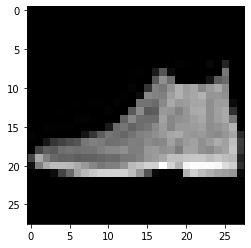

In [43]:
import matplotlib.pyplot as plt
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    tensor_4d = x.unsqueeze(0)
    grid = torchvision.utils.make_grid(tensor_4d)
    plt.imshow(grid.permute(1,2,0))
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')